In [61]:
# Install pandas package
%pip install pandas

import pandas as pd

# Load the dataset (Ensure the CSV file is in the same directory)
df = pd.read_csv("weather_forecast_data.csv")

# Display the first 5 rows to verify
print(df.head())



[notice] A new release of pip is available: 23.2.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.
   Temperature   Humidity  Wind_Speed  Cloud_Cover     Pressure     Rain
0    23.720338  89.592641    7.335604    50.501694  1032.378759     rain
1    27.879734  46.489704    5.952484     4.990053   992.614190  no rain
2    25.069084  83.072843    1.371992    14.855784  1007.231620  no rain
3    23.622080  74.367758    7.050551    67.255282   982.632013     rain
4    20.591370  96.858822    4.643921    47.676444   980.825142  no rain


In [62]:
# Clean the dataset
df['Rain'] = df['Rain'].map({'no rain': 0, 'rain': 1}).dropna()

# Drop rows with missing values
df = df.dropna(subset=['Temperature', 'Humidity', 'Wind_Speed', 'Pressure', 'Cloud_Cover'])

In [63]:
df.head()

,Temperature,Humidity,Wind_Speed,Cloud_Cover,Pressure,Rain
0,23.720338,89.592641,7.335604,50.501694,1032.378759,1
1,27.879734,46.489704,5.952484,4.990053,992.614190,0
2,25.069084,83.072843,1.371992,14.855784,1007.231620,0
3,23.622080,74.367758,7.050551,67.255282,982.632013,1
4,20.591370,96.858822,4.643921,47.676444,980.825142,0


In [64]:
X = df[['Temperature', 'Humidity', 'Wind_Speed', 'Pressure', 'Cloud_Cover']]
y = df['Rain']

In [65]:
# Display information for the dataset
print("Dataset Information: \n")
train_info = df.info()
display(train_info)
print('\n')
print("Dataset Statistical Summary: \n")
display(df.describe().T)

Dataset Information: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  2500 non-null   float64
 1   Humidity     2500 non-null   float64
 2   Wind_Speed   2500 non-null   float64
 3   Cloud_Cover  2500 non-null   float64
 4   Pressure     2500 non-null   float64
 5   Rain         2500 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 117.3 KB


None



Dataset Statistical Summary: 



,count,mean,std,min,25%,50%,75%,max
Temperature,2500.0,22.581725,7.326996,10.001842,16.359398,22.536448,28.976476,34.995214
Humidity,2500.0,64.347094,19.954739,30.005071,47.339815,63.920797,81.561021,99.997481
Wind_Speed,2500.0,9.906255,5.780316,0.009819,4.761909,9.908572,14.948408,19.999132
Cloud_Cover,2500.0,49.658104,29.123104,0.015038,23.900016,49.488284,75.324140,99.997795
Pressure,2500.0,1014.312336,20.196433,980.014486,996.938630,1013.433035,1031.735067,1049.985593
Rain,2500.0,0.125600,0.331464,0.000000,0.000000,0.000000,0.000000,1.000000


In [66]:
# Display the number of unique values in each column of the dataset
print("Unique values in dataset:")
df_unique_counts = df.nunique()
print(df_unique_counts)

Unique values in dataset:
Temperature    2500
Humidity       2500
Wind_Speed     2500
Cloud_Cover    2500
Pressure       2500
Rain              2
dtype: int64


In [67]:
# Define a custom color map
colors = ['#0077b6', '#00b4d8', '#90e0ef','#d8b2ff', '#b266ff', '#4500e2' ]  


[notice] A new release of pip is available: 23.2.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.


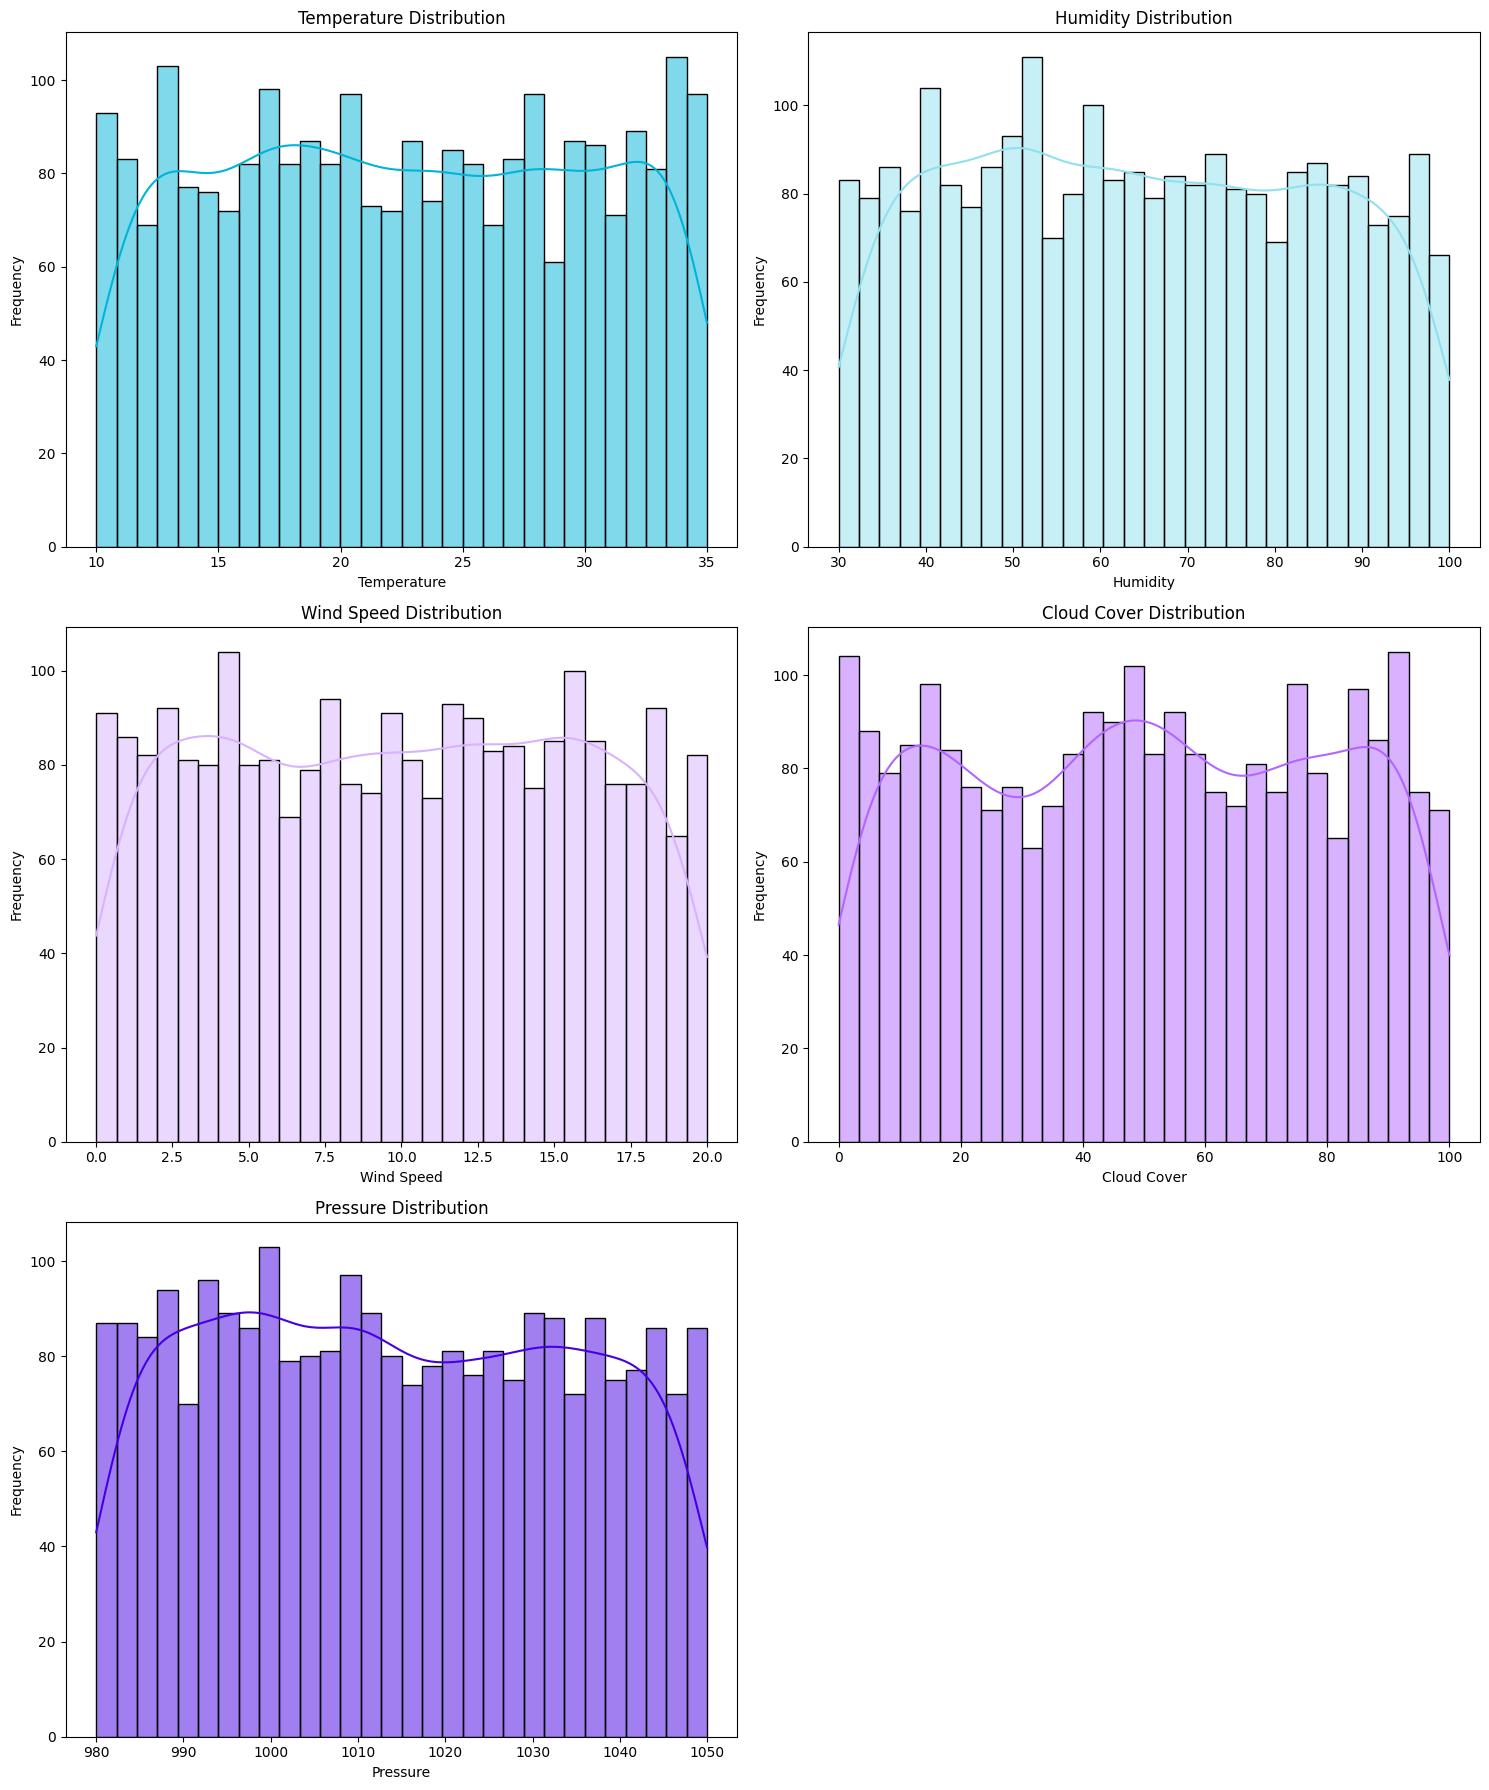

In [68]:
# Install matplotlib and seaborn packages
%pip install matplotlib seaborn

import matplotlib.pyplot as plt
import seaborn as sns
# Function to perform univariate analysis for numeric columns
def univariate_analysis(data, columns):
    plt.figure(figsize=(15, 18))  
    
    for i, column in enumerate(columns, 1):
        plt.subplot(3, 2, i)  
        sns.histplot(data[column], kde=True, bins=30, color=colors[i % len(colors)])
        plt.title(f'{column.replace("_", " ")} Distribution')
        plt.xlabel(column.replace('_', ' '))
        plt.ylabel('Frequency')
    
    plt.tight_layout()
    plt.show()

columns_to_analyze = ['Temperature', 'Humidity', 'Wind_Speed', 'Cloud_Cover', 'Pressure']

univariate_analysis(df, columns_to_analyze)

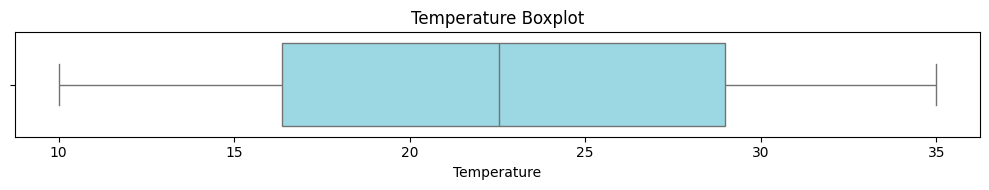


Summary Statistics for Temperature:
 count    2500.000000
mean       22.581725
std         7.326996
min        10.001842
25%        16.359398
50%        22.536448
75%        28.976476
max        34.995214
Name: Temperature, dtype: float64


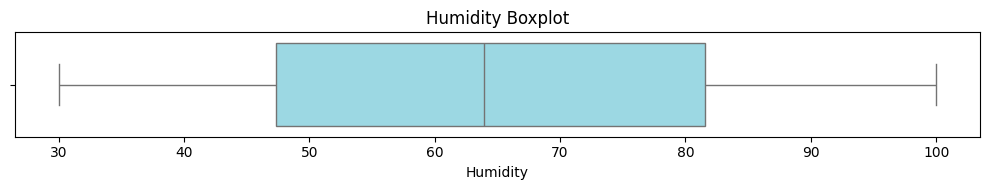


Summary Statistics for Humidity:
 count    2500.000000
mean       64.347094
std        19.954739
min        30.005071
25%        47.339815
50%        63.920797
75%        81.561021
max        99.997481
Name: Humidity, dtype: float64


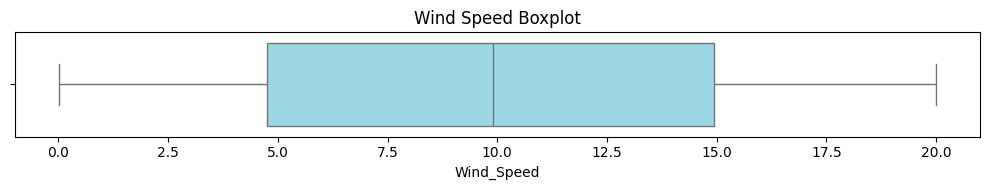


Summary Statistics for Wind Speed:
 count    2500.000000
mean        9.906255
std         5.780316
min         0.009819
25%         4.761909
50%         9.908572
75%        14.948408
max        19.999132
Name: Wind_Speed, dtype: float64


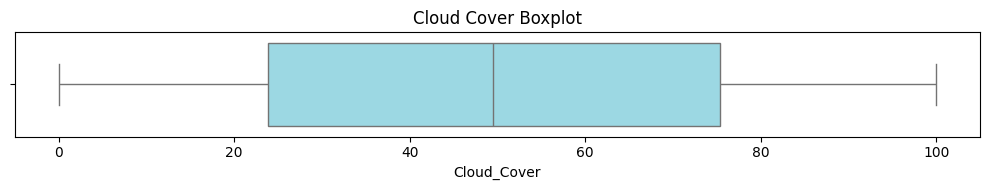


Summary Statistics for Cloud Cover:
 count    2500.000000
mean       49.658104
std        29.123104
min         0.015038
25%        23.900016
50%        49.488284
75%        75.324140
max        99.997795
Name: Cloud_Cover, dtype: float64


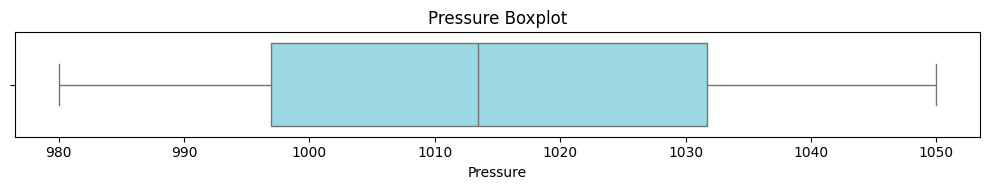


Summary Statistics for Pressure:
 count    2500.000000
mean     1014.312336
std        20.196433
min       980.014486
25%       996.938630
50%      1013.433035
75%      1031.735067
max      1049.985593
Name: Pressure, dtype: float64


In [69]:
# Function to perform univariate analysis for numeric columns
def univariate_analysis(data, column, title):
    plt.figure(figsize=(10, 2))
    
    # Use a custom color from the palette
    sns.boxplot(x=data[column], color=colors[2])  # Selected a color from the palette for consistency
    plt.title(f'{title} Boxplot')
    
    plt.tight_layout()
    plt.show()

    print(f'\nSummary Statistics for {title}:\n', data[column].describe())

columns_to_analyze = ['Temperature', 'Humidity', 'Wind_Speed', 'Cloud_Cover', 'Pressure']
for column in columns_to_analyze:
    univariate_analysis(df, column, column.replace('_', ' '))

<Figure size 800x500 with 0 Axes>

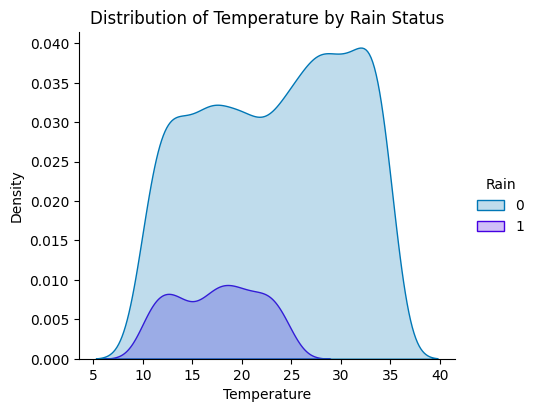

<Figure size 800x500 with 0 Axes>

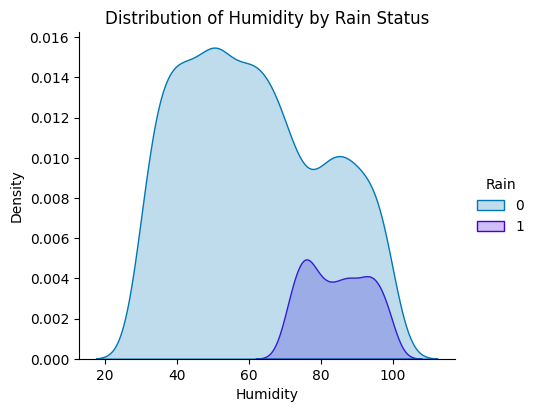

<Figure size 800x500 with 0 Axes>

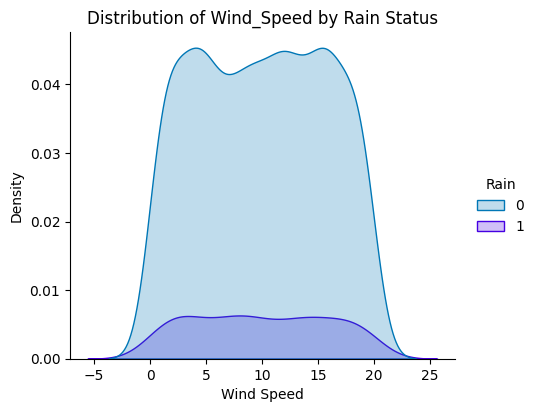

<Figure size 800x500 with 0 Axes>

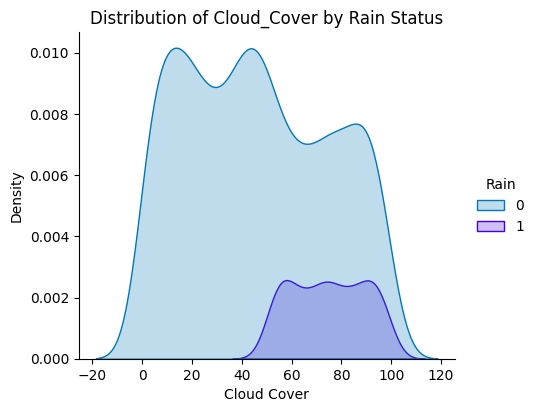

<Figure size 800x500 with 0 Axes>

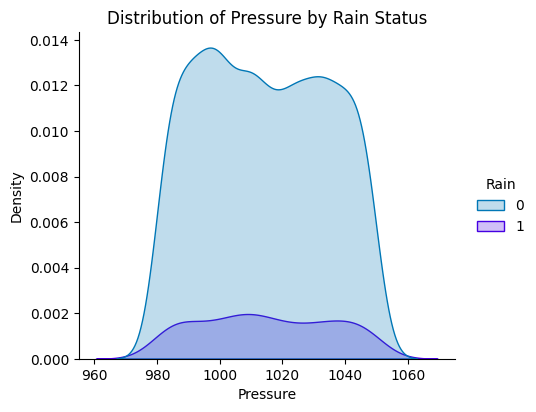

In [70]:
# Loop through each column and create a displot comparing distributions by 'Rain'
for column in columns_to_analyze:
    plt.figure(figsize=(8, 5))
    color_selection = [colors[0], colors[5]] 
    
    sns.displot(
        data=df,
        x=column,
        hue="Rain",
        kind="kde",
        fill=True,
        palette=color_selection,  
        height=4,
        aspect=1.2
    )
    
    plt.title(f'Distribution of {column} by Rain Status')
    plt.xlabel(column.replace('_', ' '))
    plt.ylabel('Density')
    plt.show()

Observations:

Temperature: There is a noticeable difference between the rain and no rain distributions. The rain distribution appears to be slightly shifted towards lower temperatures compared to no rain.

Humidity: Higher humidity levels are more associated with rain, as shown by the density peak for the rain category around higher humidity values.

Wind Speed: The rain distribution shows a slight shift towards lower wind speeds compared to no rain.

Cloud Cover: Higher cloud cover values are more prevalent for the rain category, as expected. The no rain distribution shows a wider range with a peak around moderate cloud cover values.

Pressure: Lower pressure values are more commonly associated with rain, while no rain events are spread over a wider range of pressures.

These observations suggest that certain features such as humidity, cloud cover, and pressure have stronger associations with the Rain status.

In [71]:
# X = df[['Humidity', 'Pressure', 'Cloud_Cover']]
# y = df['Rain']

In [72]:
%pip install distutils
%pip install --upgrade numpy scikit-learn

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import joblib

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement distutils (from versions: none)
ERROR: No matching distribution found for distutils

[notice] A new release of pip is available: 23.2.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [73]:
# Normalize data
scaler_X = MinMaxScaler(feature_range=(0, 1))
scaler_y = MinMaxScaler(feature_range=(0, 1))

X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1))

# Save both scalers
joblib.dump(scaler_X, "scaler_X.pkl")
joblib.dump(scaler_y, "scaler_y.pkl")

print("Feature and Target scalers saved successfully!")


Feature and Target scalers saved successfully!


In [74]:
from sklearn.model_selection import train_test_split

# Define the split ratio
train_size = 0.8  # 80% training, 20% testing

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=(1 - train_size), shuffle=True, random_state=42)

# Reshape X_train and X_test for LSTM (samples, time_steps, features)
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))  # Time step = 1
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))  

# Print shapes to verify
print(f"X_train shape: {X_train.shape}, X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}, y_test shape: {y_test.shape}")


X_train shape: (2000, 1, 5), X_test shape: (500, 1, 5)
y_train shape: (2000, 1), y_test shape: (500, 1)


In [78]:
# import tensorflow as tf
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import LSTM, Dense, Dropout

# # Define the LSTM model
# model = Sequential([
#     LSTM(80, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
#     Dropout(0.2),

#     LSTM(40, return_sequences=False),
#     Dropout(0.2),

#     Dense(20, activation='relu'),
#     Dense(1, activation='sigmoid')  # Sigmoid for binary classification
# ])

# # Compile the model with a slightly lower learning rate
# optimizer = tf.keras.optimizers.Adam(learning_rate=0.0007)
# model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# # Train the model
# history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# # Save the optimized model
# model.save("model.h5")

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.regularizers import l2

# model = Sequential([
#     LSTM(256, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
#     BatchNormalization(),
#     Dropout(0.25),  # Reduced Dropout for better learning

#     LSTM(128, return_sequences=True),
#     BatchNormalization(),
#     Dropout(0.25),

#     LSTM(96, return_sequences=False),  # Increased neurons
#     BatchNormalization(),
#     Dropout(0.2),  

#     Dense(64),
#     LeakyReLU(alpha=0.01),  # Leaky ReLU for better gradient flow
#     Dense(32),
#     LeakyReLU(alpha=0.01),  
#     Dense(1, activation="sigmoid")  # Output for binary classification
# ])




model = Sequential([
    LSTM(128, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2]), kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Dropout(0.3),  # Increased dropout  

    LSTM(64, return_sequences=True, kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Dropout(0.3),

    LSTM(48, return_sequences=False, kernel_regularizer=l2(0.001)),  # Reduced neurons
    BatchNormalization(),
    Dropout(0.3),  

    Dense(32, kernel_regularizer=l2(0.001)),
    LeakyReLU(alpha=0.01),  
    Dropout(0.3),  

    Dense(1, activation="sigmoid")  # Output for binary classification
])


# Use a lower learning rate
optimizer = Adam(learning_rate=0.0003)

model.compile(optimizer=optimizer, loss="binary_crossentropy", metrics=["accuracy"])


from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

early_stop = EarlyStopping(monitor='val_loss', patience=8, restore_best_weights=True, verbose=1)

lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, verbose=1)

history = model.fit(X_train, y_train, validation_data=(X_test, y_test), 
                    epochs=100, batch_size=32, callbacks=[early_stop, lr_scheduler])

# Save the optimized model
model.save("model.h5")

Epoch 1/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 9s 28ms/step - accuracy: 0.6560 - loss: 0.9416 - val_accuracy: 0.8860 - val_loss: 0.9182 - learning_rate: 3.0000e-04
Epoch 2/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8352 - loss: 0.6540 - val_accuracy: 0.8860 - val_loss: 0.8424 - learning_rate: 3.0000e-04
Epoch 3/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8813 - loss: 0.5490 - val_accuracy: 0.8860 - val_loss: 0.7714 - learning_rate: 3.0000e-04
Epoch 4/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9043 - loss: 0.4951 - val_accuracy: 0.8860 - val_loss: 0.6978 - learning_rate: 3.0000e-04
Epoch 5/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9319 - loss: 0.4266 - val_accuracy: 0.8860 - val_loss: 0.6214 - learning_rate: 3.0000e-04
Epoch 6/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9160 - loss: 0.4249 - val_accuracy: 0.8860 - val_loss: 0.5306 - learning_rate: 3.0000e-04
Epoch 7/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.922

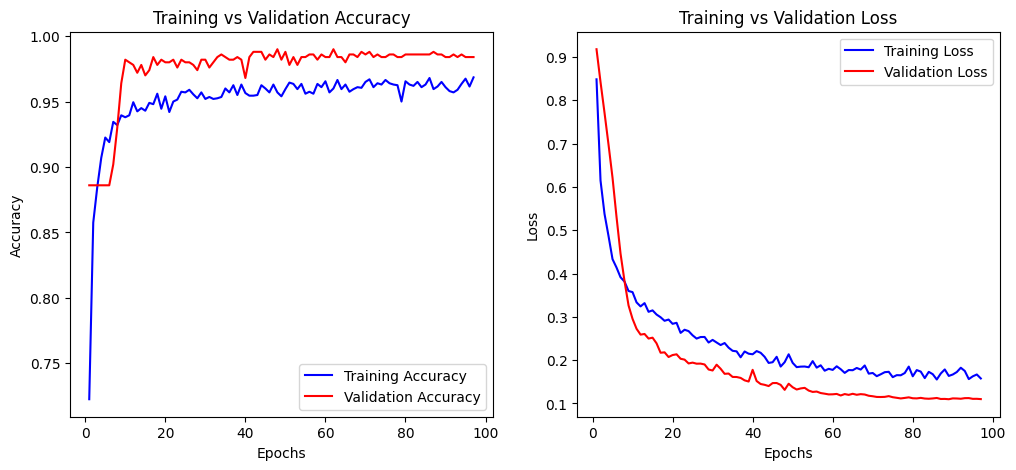

In [79]:
import matplotlib.pyplot as plt

# Extract accuracy and loss from history
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(train_acc) + 1)

# Plot Accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, train_acc, 'b-', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r-', label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(epochs, train_loss, 'b-', label='Training Loss')
plt.plot(epochs, val_loss, 'r-', label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()

# Show plots
plt.show()
